**Cast any date columns as a datetime format**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


listing_data = pd.read_csv('../data analysis project/csv data/Airbnb Data/Listings.csv',encoding='ISO-8859-1',low_memory=False)


In [70]:
listing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

**Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’**

In [80]:
filter_listing = listing_data.loc[listing_data['city']=='Paris',['host_since','neighbourhood','city','accommodates','price']]
filter_listing

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


**QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field**



**find missing value**

In [72]:
mask = filter_listing.loc[:,:].isna().sum()
mask

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

**find min value** 

In [52]:
filter_listing.loc[:,['accommodates','price']].min()

accommodates    0
price           0
dtype: int64

**find max value**

In [53]:
filter_listing.loc[:,['accommodates','price']].max()

accommodates       16
price           12000
dtype: int64

**find average value**

In [54]:
filter_listing.loc[:,['accommodates','price']].mean().round(2)

accommodates      3.04
price           113.10
dtype: float64

In [55]:
filter_listing.iloc[:,[3,4]].describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


***Prepare the data for visualization***

**Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)**

In [73]:
paris_listings_neighbourhood = filter_listing.groupby('neighbourhood').agg({'price':'mean'})
paris_listings_neighbourhood.sort_values(by='price')

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


****Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)****



In [57]:
paris_listings_accomodations = filter_listing.query("neighbourhood == 'Elysee'").groupby('accommodates').agg({'price':'mean'})
paris_listings_accomodations


,price
accommodates,
0,0.000000
1,79.522222
2,155.103352
3,152.828767
4,212.096070
5,328.817073
6,355.508571
7,411.538462
8,405.518519


**Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts**

In [81]:
filter_listing['host_since'] = filter_listing['host_since'].astype('datetime64[ns]')

In [82]:
filter_listing = filter_listing.set_index('host_since')
filter_listing

,neighbourhood,city,accommodates,price
host_since,,,,
2011-12-03,Buttes-Montmartre,Paris,2,53
2013-11-29,Buttes-Montmartre,Paris,2,120
2014-07-31,Elysee,Paris,2,89
2013-12-17,Vaugirard,Paris,2,58
2014-12-14,Passy,Paris,2,60
...,...,...,...,...
2015-04-13,Observatoire,Paris,2,120
2013-11-27,Buttes-Montmartre,Paris,2,60
2012-04-27,Buttes-Montmartre,Paris,2,50


In [84]:
paris_listings_over_time = filter_listing.resample('YE').agg({'price':'mean','neighbourhood':'count'})
paris_listings_over_time


,price,neighbourhood
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592
2013-12-31,107.096414,8142
2014-12-31,100.253800,10922
2015-12-31,103.646250,12147
2016-12-31,114.159847,8871


**Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed**


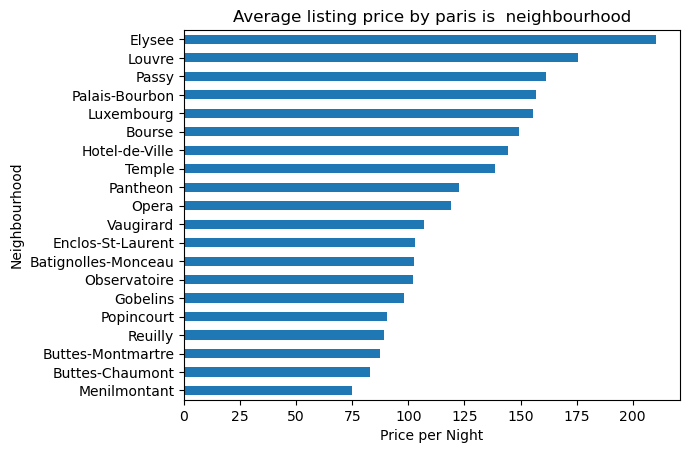

In [85]:
paris_listings_neighbourhood.sort_values(by='price',ascending=True).plot.barh(
    title = 'Average listing price by paris is  neighbourhood',
    xlabel = 'Price per Night',
    ylabel = 'Neighbourhood',
    legend=False
);


Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed****

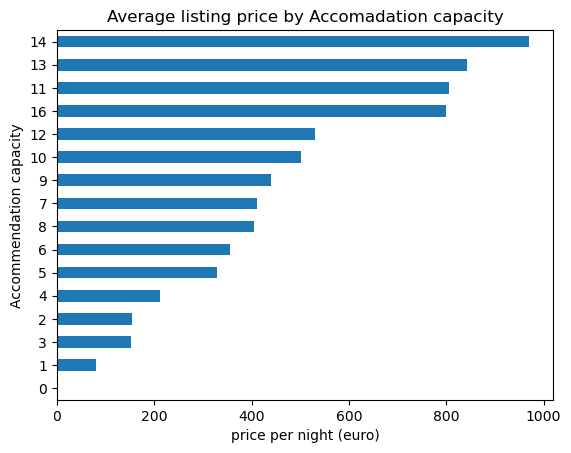

In [86]:
paris_listings_accomodations.sort_values(by='price',ascending=True).plot.barh(
    title = 'Average listing price by Accomadation capacity',
    xlabel = 'price per night (euro)',
    ylabel = 'Accommendation capacity',
    legend=False
);


****Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed****

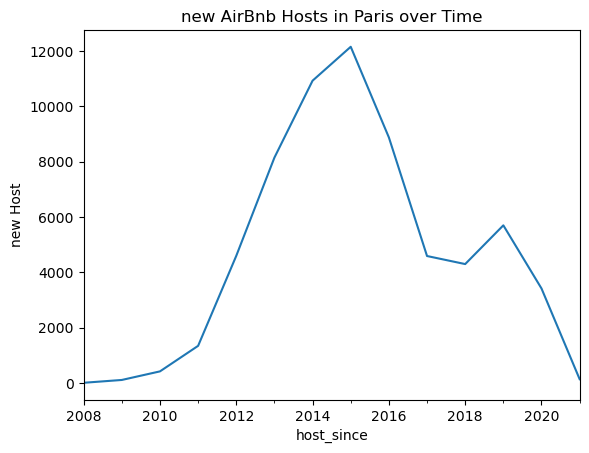

In [87]:
paris_listings_over_time['neighbourhood'].plot(
    ylabel='new Host',
    title= 'new AirBnb Hosts in Paris over Time'
);

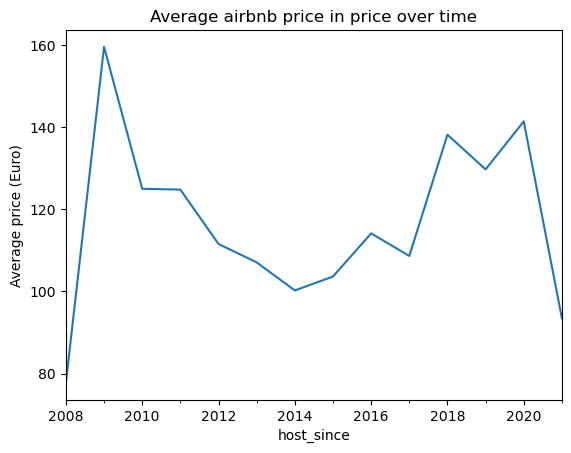

In [88]:
paris_listings_over_time['price'].plot(
    ylabel='Average price (Euro)',
    title= 'Average airbnb price in price over time'
);

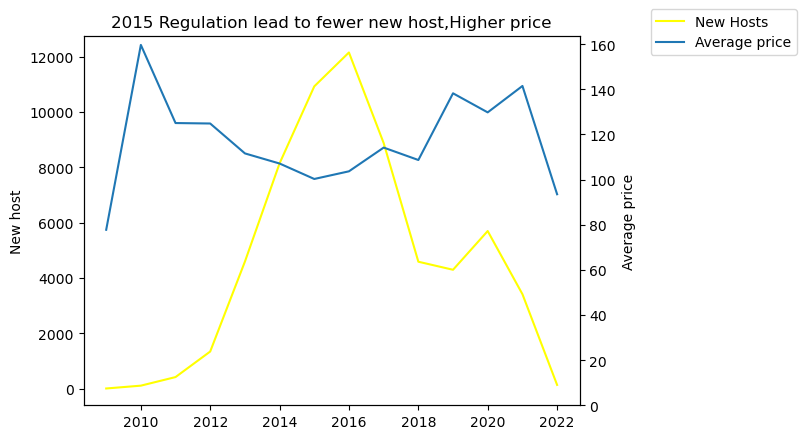

In [92]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(
    paris_listings_over_time['neighbourhood'].index,
    paris_listings_over_time['neighbourhood'],
    c='yellow',
    label="New Hosts",
)
ax.set_ylabel('New host');
ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time['price'].index,
    paris_listings_over_time['price'],
    label="Average price",

    
)
ax2.set_ylim(0)
ax2.set_ylabel('Average price');
ax.set_title('2015 Regulation lead to fewer new host,Higher price');
fig.legend(bbox_to_anchor=(1.25, 0.95))

plt.savefig('airbnb-2',dpi=700)